In [69]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  scipy.stats as st

In [70]:
#load the csv file
df = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')
#

In [71]:
platform_num = df.iloc[:,7:11].sum()
platform_list = platform_num.index
platform_list 

Index(['Netflix', 'Hulu', 'Prime Video', 'Disney+'], dtype='object')

In [72]:
df['Platforms']=''
for platform in platform_list:  
    df['Platforms'].loc[df[platform]==1] = platform
score_df = df[['IMDb','Rotten Tomatoes','Platforms']].dropna(how='any')
score_df['Rotten Tomatoes'] = score_df['Rotten Tomatoes'].apply(lambda x: x.strip("%")).astype(float)
score_df

C:\Users\Wei\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,IMDb,Rotten Tomatoes,Platforms
0,8.8,87.0,Netflix
1,8.7,87.0,Netflix
2,8.5,84.0,Netflix
3,8.5,96.0,Netflix
4,8.8,97.0,Prime Video
...,...,...,...
16671,3.3,17.0,Disney+
16677,4.7,13.0,Disney+
16687,3.0,6.0,Disney+
16705,4.1,7.0,Disney+


In [73]:
df['Platforms']=''
for platform in platform_list:  
    df['Platforms'].loc[df[platform]==1] = platform
IMDb_df = df[['IMDb','Platforms']].dropna(how='any')
IMDb_df[IMDb_df['IMDb']>9]

C:\Users\Wei\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,IMDb,Platforms
947,9.1,Netflix
1292,9.3,Netflix
5110,9.3,Prime Video
6566,9.3,Prime Video
6837,9.3,Prime Video
7220,9.3,Prime Video
7426,9.3,Prime Video
7491,9.1,Prime Video
8458,9.1,Prime Video


In [74]:
bins = [0, 5.9, 6.9, 7.9, 8.9, 9.9]
group_names = ['below 6.0','6.0-6.9','7.0-7.9','8.0-8.9','9.0-10']
IMDb_df['IMDb ranges'] = pd.cut(IMDb_df['IMDb'],bins,labels=group_names,include_lowest=True)
IMDb_df[IMDb_df['IMDb ranges']=='9.0-10']


,IMDb,Platforms,IMDb ranges
947,9.1,Netflix,9.0-10
1292,9.3,Netflix,9.0-10
3560,9.0,Hulu,9.0-10
5110,9.3,Prime Video,9.0-10
6566,9.3,Prime Video,9.0-10
6837,9.3,Prime Video,9.0-10
7002,9.0,Prime Video,9.0-10
7220,9.3,Prime Video,9.0-10
7267,9.0,Prime Video,9.0-10
7426,9.3,Prime Video,9.0-10


In [75]:
IMDb_df.groupby('Platforms')['IMDb ranges'].value_counts()


Platforms    IMDb ranges
Disney+      6.0-6.9         217
             below 6.0       165
             7.0-7.9         145
             8.0-8.9          36
Hulu         below 6.0       270
             6.0-6.9         200
             7.0-7.9         148
             8.0-8.9          28
             9.0-10            1
Netflix      below 6.0      1090
             6.0-6.9        1065
             7.0-7.9         772
             8.0-8.9         145
             9.0-10            2
Prime Video  below 6.0      5964
             6.0-6.9        3407
             7.0-7.9        2123
             8.0-8.9         386
             9.0-10            9
Name: IMDb ranges, dtype: int64

In [76]:
df['Platforms']=''
for platform in platform_list:  
    df['Platforms'].loc[df[platform]==1] = platform
IMDb_df = df[['IMDb','Platforms']].dropna(how='any')
score_df['Rotten Tomatoes'] = score_df['Rotten Tomatoes'].apply(lambda x: x.strip("%")).astype(float)
score_df

C:\Users\Wei\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


AttributeError: 'float' object has no attribute 'strip'

In [77]:
bins = [0,5.9,6.9,7.9,8.9,10]
group_names = ['below 6.0','6.0-6.9','7.0-7.9','8.0-8.9','9.0-10']
score_df['IMDb ranges'] = pd.cut(score_df['IMDb'],bins,labels=group_names,include_lowest=True)
score_df.groupby('Platforms')['IMDb ranges'].value_counts()
score_df[score_df['IMDb']>9]

,IMDb,Rotten Tomatoes,Platforms,IMDb ranges


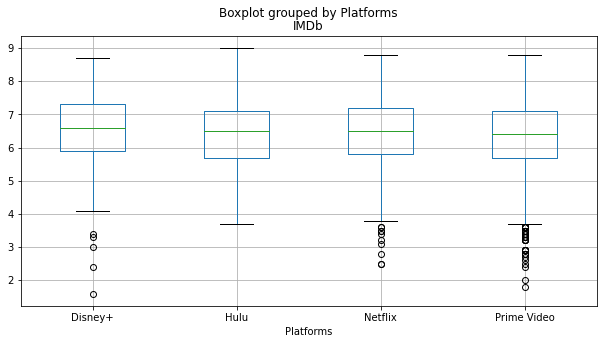

In [78]:
score_df.boxplot('IMDb',by='Platforms',figsize=(10,5))
plt.show()


In [80]:
disney_gp = score_df['IMDb'].loc[score_df['Platforms']=='Disney+']
netflix_gp = score_df['IMDb'].loc[score_df['Platforms']=='Netflix']
hulu_gp = score_df['IMDb'].loc[score_df['Platforms']=='Hulu']
pv_gp = score_df['IMDb'].loc[score_df['Platforms']=='Prime Video']
#st.f_oneway(disney_gp, netflix_gp, hulu_gp, pv_gp)
st.ttest_ind(disney_gp, hulu_gp, equal_var=False)

Ttest_indResult(statistic=1.30945996938015, pvalue=0.1908168259804307)

In [24]:
st.ttest_ind(disney_gp, pv_gp, equal_var=False)
st.ttest_ind(netflix_gp, pv_gp, equal_var=False)
st.ttest_ind(netflix_gp, pv_gp, equal_var=False)

Ttest_indResult(statistic=0.0, pvalue=1.0)

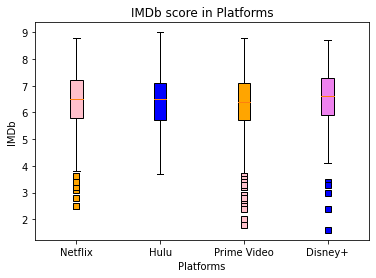

In [5]:
colors = ['pink','blue','orange','violet']
IMDb_list = []
i=0
for platform in platform_list:
    filt = (score_df['Platforms']==platform)
    IMDb_list = list(score_df['IMDb'].loc[filt])
    plt.boxplot(IMDb_list,positions = [i],flierprops=dict(markerfacecolor=colors[i-2], marker='s'),boxprops=dict(facecolor=colors[i]), patch_artist=True)
    i = i+1
x_axis = np.arange(len(platform_list))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, platform_list)
plt.xlabel('Platforms')
plt.ylabel('IMDb')
plt.title('IMDb score in Platforms')
plt.savefig('output/IMDb_score_box')
plt.show()

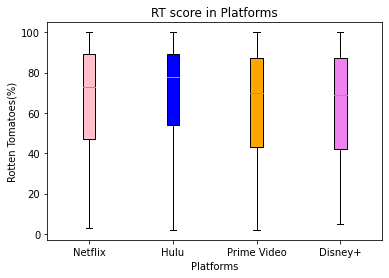

In [6]:
colors = ['pink','blue','orange','violet']
IMDb_list = []
i=0
for platform in platform_list:
    filt = (score_df['Platforms']==platform)
    RT_list = list(score_df['Rotten Tomatoes'].loc[filt])
    plt.boxplot(RT_list,positions = [i],flierprops=dict(markerfacecolor=colors[i-2], marker='s'),boxprops=dict(facecolor=colors[i]), patch_artist=True)
    i = i+1
x_axis = np.arange(len(platform_list))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, platform_list)
plt.xlabel('Platforms')
plt.ylabel('Rotten Tomatoes(%)')
plt.title('RT score in Platforms')
plt.savefig('output/RT_score_box')
plt.show()

the correlation (r) value  for two socre systems is 0.6163204883344221


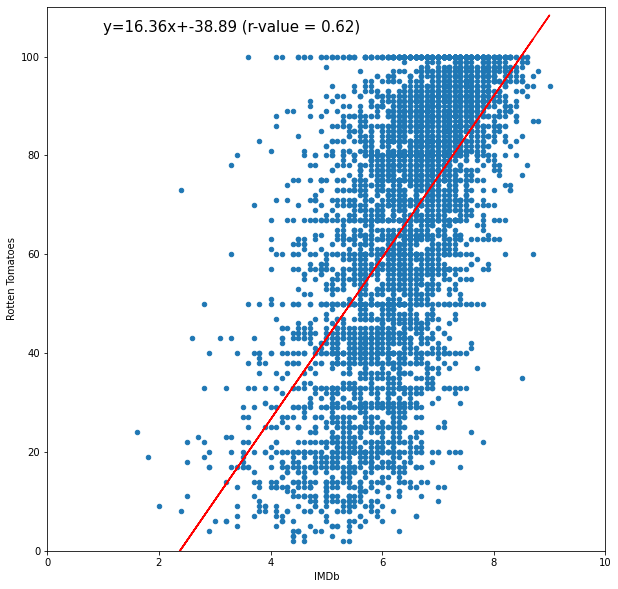

In [10]:
### Comparison of IMDb and Rotten Tomatoes
socre_df = df[['IMDb','Rotten Tomatoes']].dropna(how='any')
socre_df['Rotten Tomatoes'] = socre_df['Rotten Tomatoes'].apply(lambda x: x.strip("%")).astype(float)
socre_df.plot.scatter('IMDb','Rotten Tomatoes',figsize=(10,10))
x_values = socre_df['IMDb']
y_values = socre_df['Rotten Tomatoes']
(m,b,r,p,sem) = st.linregress(x_values, y_values)
regress_values = m*x_values+b
plt.plot(x_values,regress_values,'r-')
print(f'the correlation (r) value  for two socre systems is {r}')
line = f'y={round(m,2)}x+{round(b,2)} (r-value = {round(r,2)})'
plt.xlim(0,10)
plt.ylim(0,110)
plt.annotate(line,(1,105),fontsize=15)
plt.savefig('output/correlation for IMDb and RT')
plt.show()

In [66]:
df['Age'] = df['Age'].fillna('Not Mentioned')
age_df = df.groupby('Age')[platform_list].sum()
age_df

,Netflix,Hulu,Prime Video,Disney+
Age,,,,
13+,383,119,819,40
16+,89,17,226,1
18+,752,290,2612,3
7+,323,109,916,179
Not Mentioned,1883,313,7375,64
all,130,55,406,277


In [98]:
age_T_df = age_df.T
age_T_df['Age Grouped'] = age_T_df[0:6].sum(axis = 1)-age_T_df['Not Mentioned']
age_T_df

Age,13+,16+,18+,7+,Not Mentioned,all,Age Grouped
Netflix,383,89,752,323,1883,130,1677
Hulu,119,17,290,109,313,55,590
Prime Video,819,226,2612,916,7375,406,4979
Disney+,40,1,3,179,64,277,500


In [68]:
age_T_df[['Not Mentioned','Age Grouped']].plot.barh(stacked=True)
plt.legend(loc='best')
plt.xlabel('Platforms')
plt.ylabel('Number of Movies')
plt.title('Age-ungrouped vs. Not_mentioned')
plt.legend(loc='lower right')
plt.savefig('output/Age-ungrouped vs Not Mentioned')
plt.show()

NameError: name 'age_T_df' is not defined

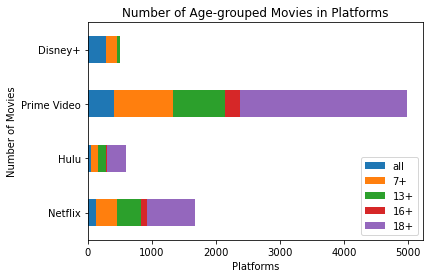

In [101]:
age_T_df[,['all','7+','13+','16+','18+']].plot.barh(stacked=True)
plt.legend(loc='best')
plt.xlabel('Platforms')
plt.ylabel('Number of Movies')
plt.title('Number of Age-grouped Movies in Platforms')
plt.savefig('output/Age-grouped Movies in Platforms')
plt.show()

In [26]:
df.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime', 'Platforms'],
      dtype='object')

In [8]:
df[df.iloc[:,7:11].sum(axis=1)==1] 

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [16]:
df[df['Year']>2018].iloc[:,7:11].sum()

Netflix        532
Hulu           110
Prime Video    203
Disney+         32
dtype: int64